In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_happy = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [3]:
df_happy.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


###### Checking the dataset shape

In [4]:
df_happy.shape 

(158, 12)

###### There are 158 columns and 12 rows in dataset 

In [5]:
df_happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

As we can see above there is 2 object datatype , 1 is int and 9 are float datatypes

In [6]:
df_happy.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
df_happy.isnull().sum()  #As Describe method can display only numeric valu but we can see there is 2 object val also

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

### Observations

1. Data set is about happiness scroe of each country hence the problem type seems Regression.
2. There is no null value.
3. The mean of happnies rank column indicates that is an outliar.
4. Columns Region and contry both demonstrates identical so we can remove Region column.  
5. There are many columns like Economy (GDP per Capita) ,Family,Health (Life Expectancy),Health (Life Expectancy),Trust (Government Corruption)	,Generosity has "0" values in minimum.

### Backup dataset

In [8]:
Backup_data = df_happy.copy()

### Exploratory Data Analysis (EDA)

In [9]:
df_happy['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

##### Univariate Analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

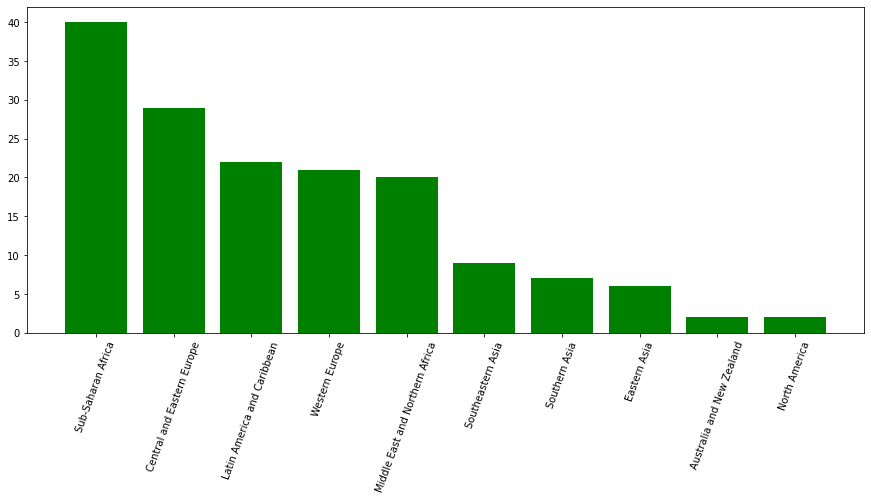

In [10]:
# Here we we are visualizing the "Region" 

plt.figure(figsize=(15,6))
plt.bar(list(df_happy['Region'].value_counts().keys()),list(df_happy['Region'].value_counts()),color='g')
plt.xticks(rotation=70)

As per above visualization we can see the most most country's are situated in "Sub-Saharan Africa" continent and the least are situated in the North America.

##### Bivariate Analysis

In [11]:
#lets see the comparison between 2 columns 
happy_country = df_happy[['Country','Happiness Rank']]

In [12]:
happy_country.head()

,Country,Happiness Rank
0,Switzerland,1
1,Iceland,2
2,Denmark,3
3,Norway,4
4,Canada,5


In [13]:
happy_country=happy_country.sort_values(by=['Happiness Rank'],ascending=True)

In [14]:
happy_country.head()

,Country,Happiness Rank
0,Switzerland,1
1,Iceland,2
2,Denmark,3
3,Norway,4
4,Canada,5


<BarContainer object of 10 artists>

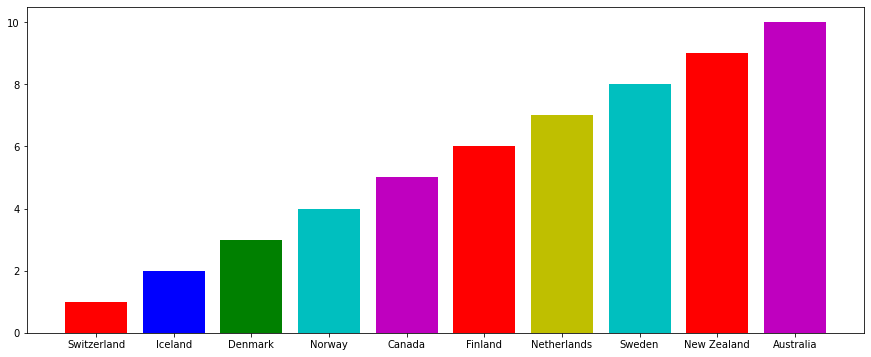

In [15]:
plt.figure(figsize=(15,6))

plt.bar(list(happy_country['Country'])[0:10],list(happy_country['Happiness Rank'])[0:10],color=['r','b','g','c','m','r','y','c','r','m'])

Above are listed top 10 happiest country 

In [16]:
happy_region = df_happy[['Region','Happiness Rank']]
happy_region=happy_region.sort_values(by=['Happiness Rank'],ascending=True)
happy_region.head()

,Region,Happiness Rank
0,Western Europe,1
1,Western Europe,2
2,Western Europe,3
3,Western Europe,4
4,North America,5


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

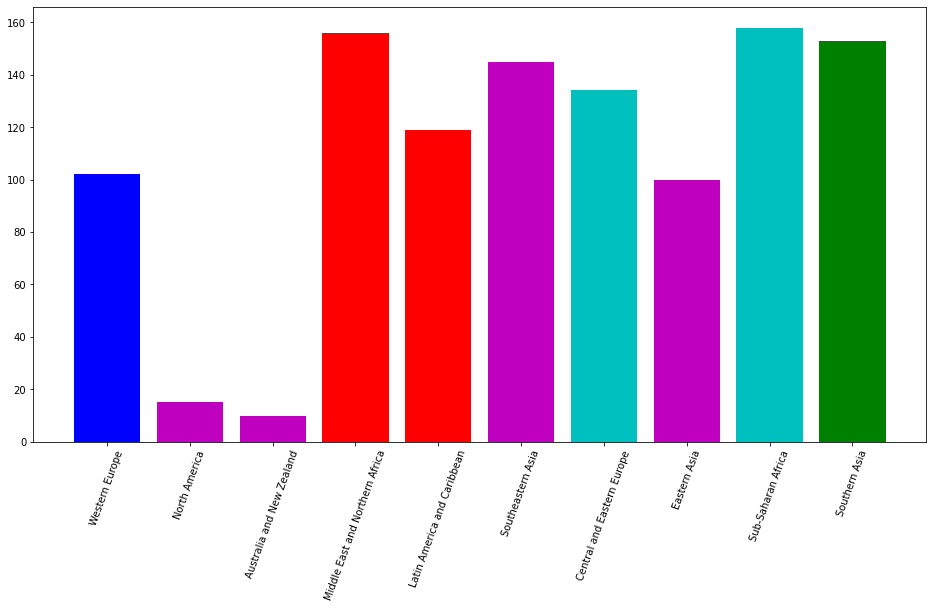

In [17]:
plt.figure(figsize=(16,8))

plt.bar(list(happy_region['Region']),list(happy_region['Happiness Rank']),color=['r','b','g','c','m','r','y','c','r','m'])
plt.xticks(rotation=70)

Above graph demonstrates the happines ranking according to the region 

#### Multivariate Analysis

In [18]:
# we are sepreting the numeric variables for visualization and analysis

df_num = df_happy.select_dtypes(include=['int','float'])

df_num.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


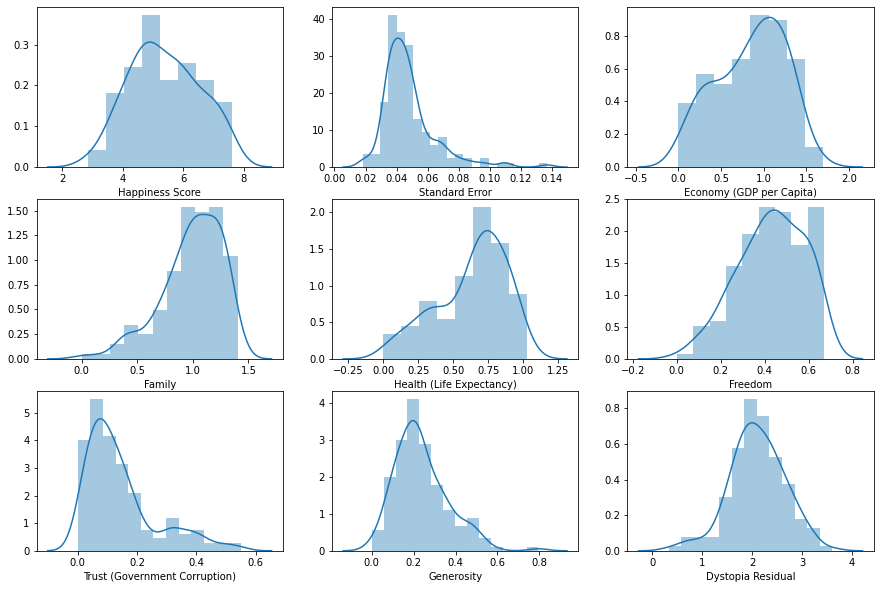

In [19]:
# Checking the distribution of data
plt.figure(figsize=(15,10))
plotnumber=1
for column in df_num:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df_num[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()   

* We can see there zero value aslo in data set which we can replace by using mean of that columns value.

In [20]:
df_happy['Family'] = df_happy['Family'].replace(0,df_happy['Family'].mean())
df_happy['Economy (GDP per Capita)'] = df_happy['Economy (GDP per Capita)'].replace(0,df_happy['Economy (GDP per Capita)'].mean())
df_happy['Health (Life Expectancy)'] = df_happy['Health (Life Expectancy)'].replace(0,df_happy['Health (Life Expectancy)'].mean())
df_happy['Freedom'] = df_happy['Freedom'].replace(0,df_happy['Freedom'].mean())
df_happy['Generosity'] = df_happy['Generosity'].replace(0,df_happy['Generosity'].mean())
df_happy['Trust (Government Corruption)'] = df_happy['Trust (Government Corruption)'].replace(0,df_happy['Trust (Government Corruption)'].mean())

In [21]:
df_num1 = df_happy.select_dtypes(include=['int','float'])

df_num1.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.851493,0.997318,0.634248,0.431328,0.144330,0.238797,2.098977
std,1.145010,0.017146,0.397388,0.260556,0.241870,0.146734,0.119484,0.125252,0.553550
min,2.839000,0.018480,0.015300,0.139950,0.047760,0.076990,0.002270,0.001990,0.328580
25%,4.526000,0.037268,0.557532,0.861422,0.447215,0.329603,0.062550,0.154913,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.108770,0.217155,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


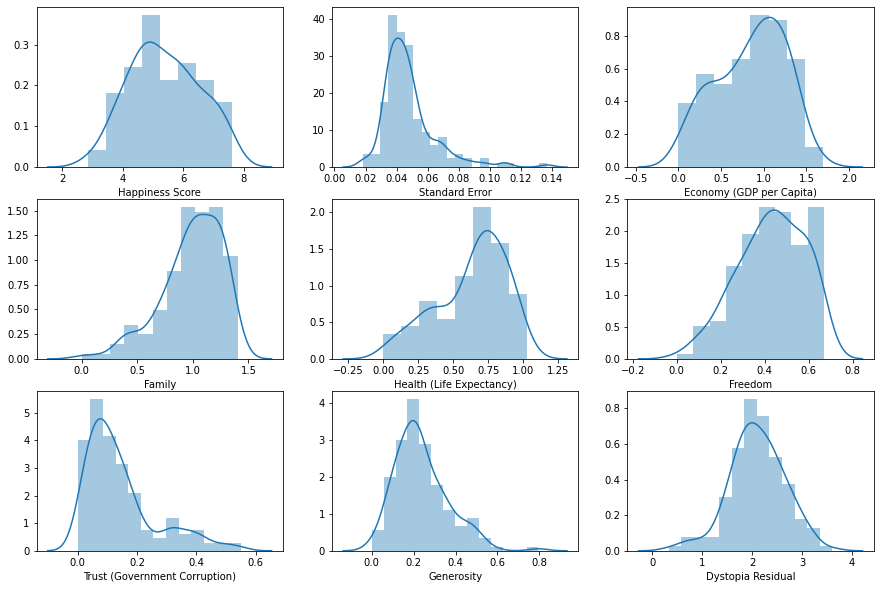

In [22]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in df_num:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df_num[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()   

####  Checking Outliars and Removel

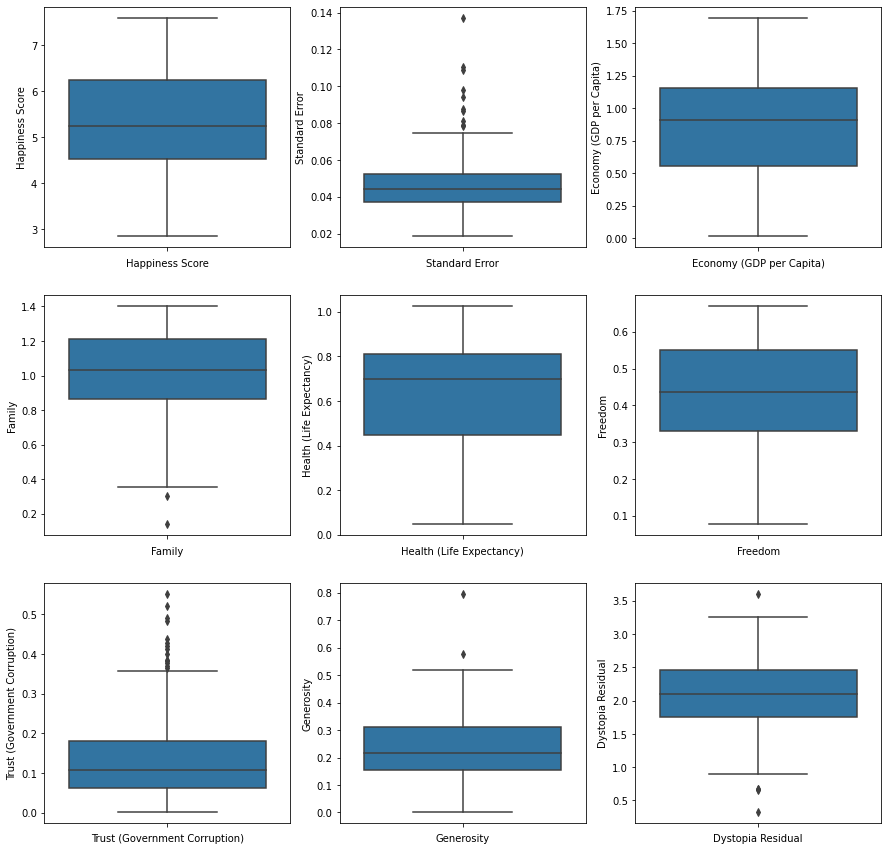

In [23]:
plt.figure(figsize=(15,15))
plotnumber=1
for column in df_num1:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        sns.boxplot(df_num1[column],orient='v')
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()   

Above we can check there are few columns like Standard Error , Family , Trust (Government Corruption) , Generosity and
Dystopia Residual has outliars

In [24]:
from scipy.stats import zscore

In [25]:
z_score = zscore(df_happy[['Standard Error','Family','Trust (Government Corruption)','Generosity','Dystopia Residual']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score <4).all(axis=1)
df_happy = df_happy[filtering_entry]
df_happy.describe()
df_happy.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [26]:
# here we are checking the corelation using heat map
df_num = df_happy.select_dtypes(include=['int','float']) ## to get the int and float columns
df_num.columns

Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [27]:
corr= df_num.corr()
corr.shape

(9, 9)

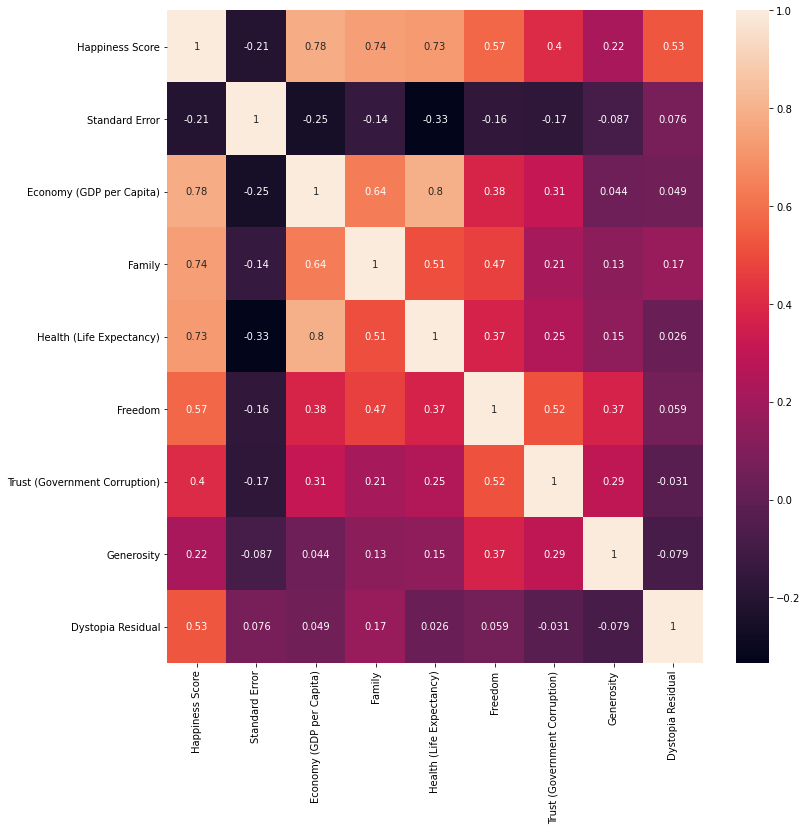

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,annot=True)
plt.show()

We can see there no much corelation between features

###### Encoding Categorical Variables

We have categorical data also in the our dataset which we can not feed to the model we have to convert into the 
numerica form hence here we are using "GET_DUMMIES"

In [29]:
df_happy = df_happy.drop(columns=['Region'],axis=1)

In [30]:
df_happy.head()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [31]:
df_final = pd.get_dummies(df_happy)

In [32]:
df_final.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,0,0,0,0,0,0,0,0,0,0
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,0,0,0,0,0,0,0,0,0,0
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,...,0,0,0,0,0,0,0,0,0,0
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,...,0,0,0,0,0,0,0,0,0,0
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,...,0,0,0,0,0,0,0,0,0,0


#### Model Buiding

We can see our data set is not in similer scale hence i am using the standardscaler to scale the data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
X = df_final.drop(['Happiness Score'],axis=1)

In [35]:
y = df_final['Happiness Score']

In [36]:
print("Shape of X", X.shape)
print("Shape of Y", y.shape)

Shape of X (156, 165)
Shape of Y (156,)


In [37]:
scaler = StandardScaler()

In [38]:
x_scale = scaler.fit_transform(X)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
#x_test,y_test,x_train,y_train = train_test_split(x_scale,y,test_size=.02,random_state=21)
X_train, X_test, y_train, y_test  = train_test_split(x_scale, y, test_size=0.33, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [42]:
lr=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
adb=AdaBoostRegressor()

print("Model is created")

Model is created


In [43]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)

print("Model is trained")

Model is trained


In [44]:
lr.score(X_train,y_train)
knn.score(X_train,y_train)
dt.score(X_train,y_train)
rf.score(X_train,y_train)
adb.score(X_train,y_train)
print("Models scores")

Models scores


In [45]:
print("le_score",lr.score(X_train,y_train))
print("knn_score",knn.score(X_train,y_train))
print("dt_score",dt.score(X_train,y_train))
print("rf_score",rf.score(X_train,y_train))
print("adb_score",adb.score(X_train,y_train))

le_score 1.0
knn_score 0.9382887310622745
dt_score 1.0
rf_score 0.9993308443214044
adb_score 0.9950499339137046


In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [47]:
lr_pred_y = lr.predict(X_test)
knn_pred_y = knn.predict(X_test)
dt_pred_y = dt.predict(X_test)
rf_pred_y = rf.predict(X_test)
adb_pred_y = adb.predict(X_test)

In [48]:
print("lr_score",mean_squared_error(y_test,lr_pred_y))
print("knn_score",mean_squared_error(y_test,knn_pred_y))
print("dt_score",mean_squared_error(y_test,dt_pred_y))
print("rf_score",mean_squared_error(y_test,rf_pred_y))
print("adb_score",mean_squared_error(y_test,adb_pred_y))

lr_score 0.09518699064707739
knn_score 0.09347792230769233
dt_score 0.013889596153846127
rf_score 0.0033927559884616492
adb_score 0.01449214695795304


Here we can see our Random forest model giving the less MSE score so we can consider it the best model.Now we can 
again use the Hyperparameter tuning to increase the models accuracy.

## Hyperparameter Tuning

In [49]:
 from sklearn.model_selection import GridSearchCV

In [50]:
rf.get_params().keys()  # to check the parameters

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [51]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10,stop=60,num=10)]

#Maximum number of samples required to split  a node
max_depth = [2,4]

#minimum number of samples required to split  a node
min_sample_split = [2,5]

#minimum number of samples required for each leaf
min_sample_leaf = [1,2]

#Selection method 
bootstrap = [True,False]

In [52]:
parm_grid = {'n_estimators':n_estimators,
            'criterion':['mse'],
            'max_depth':max_depth,'min_samples_split':min_sample_split,
            'min_samples_leaf':min_sample_leaf,'bootstrap':bootstrap}
print('parm_grid',parm_grid)

parm_grid {'n_estimators': [10, 15, 21, 26, 32, 37, 43, 48, 54, 60], 'criterion': ['mse'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [53]:
gridsearch = GridSearchCV(rf, param_grid = parm_grid , cv=3 , verbose = 2 ,n_jobs =4)

In [54]:
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   12.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   22.8s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   40.0s
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:   47.8s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'criterion': ['mse'],
                         'max_depth': [2, 4], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 15, 21, 26, 32, 37, 43, 48, 54,
                                          60]},
             verbose=2)

In [55]:
gridsearch.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 60}

In [56]:
print(f'train accuracy','=>',gridsearch.score(X_train,y_train))
print(f'test accuracy','=>',gridsearch.score(X_test,y_test))

train accuracy => 0.9983438615843649
test accuracy => 0.9961374793739467


Here we can see a little increment in score using hyper parameter tuning....!

### Model saving

In [57]:
import pickle

In [58]:
filename = 'Worldhappy_model.pickle'

In [59]:
pickle.dump(dt,open(filename,'wb'))

### Thank You........!